<a href="https://colab.research.google.com/github/Yogeshkumar170201/Machine-Learning/blob/main/TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TensorFlow**

In [1]:
import tensorflow as tf

In [4]:
tf.__version__

'2.5.0'

In [5]:
a = tf.constant(10)

In [6]:
b = tf.constant(20)

In [7]:
a+b

<tf.Tensor: shape=(), dtype=int32, numpy=30>

In [8]:
tf.executing_eagerly()

True

In [9]:
c = a + b

In [10]:
c.numpy()

30

In [18]:
x = tf.Variable(50)

In [19]:
x

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=50>

In [21]:
y = tf.Variable([10, 40, 80])

In [22]:
y

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([10, 40, 80], dtype=int32)>

In [23]:
y.assign([90, 50, 60])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=int32, numpy=array([90, 50, 60], dtype=int32)>

In [24]:
type(y)

tensorflow.python.ops.resource_variable_ops.ResourceVariable

In [11]:
type(c)

tensorflow.python.framework.ops.EagerTensor

In [12]:
type(c.numpy())

numpy.int32

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#Hide warnings
import warnings
warnings.filterwarnings('ignore')

**TensorBoard**

In [29]:
from datetime import datetime
import os
import pathlib

t = datetime.utcnow().strftime("%Y%m%d%H%M%S")
log_dir = "tf_logs"
logd = "{}/r{}/".format(log_dir, t)

# Make a directory if it doesn't exist

from pathlib import Path
home = str(Path.home())

logdir = os.path.join(os.sep, home, logd)

if not os.path.exists(logdir):
  os.makedirs(logdir)

In [30]:
logdir

'/root/tf_logs/r20210629112840/'

**Tensorflow Tensors**

In [31]:
a = tf.constant(10)
b = tf.constant(20)

In [32]:
# Note the numpy value
a

<tf.Tensor: shape=(), dtype=int32, numpy=10>

In [33]:
# .numpy() method returns the results as numpy array
a.numpy()

10

In [34]:
a*b

<tf.Tensor: shape=(), dtype=int32, numpy=200>

In [35]:
#Multiplication using Universal functions
tf.multiply(a, b).numpy()

200

In [36]:
a_matrix = tf.constant([[1, 2],[3, 4]])
b_matrix = tf.constant([[5, 6],[7, 8]])
b_matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[5, 6],
       [7, 8]], dtype=int32)>

In [37]:
tf.matmul(a_matrix, b_matrix)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[19, 22],
       [43, 50]], dtype=int32)>

In [38]:
print(a_matrix, b_matrix, sep="\n")

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[5 6]
 [7 8]], shape=(2, 2), dtype=int32)


**tf.Variable**

In [39]:
var = tf.Variable(3.)

In [40]:
var

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>

In [41]:
var.numpy()

3.0

In [43]:
 var.assign(6.7)
 var
 var.numpy()

6.7

In [47]:
# We can also create multi dim variables
# d = tf.Variable(np.random.randn(3).reshape(3,1))
d = tf.Variable(np.random.randn(3, 3))
d

<tf.Variable 'Variable:0' shape=(3, 3) dtype=float64, numpy=
array([[ 1.54888769, -0.97292127,  1.96186328],
       [ 0.36602421, -0.13032332, -0.72450472],
       [ 1.84010626,  1.51455922,  1.40610095]])>

In [48]:
var.assign(10)
print('Original value : ', var.numpy())
print('Add 1 : ', var.assign_add(1.).numpy())
print('Subtract 5 : ', var.assign_sub(5.).numpy())

Original value :  10.0
Add 1 :  11.0
Subtract 5 :  6.0


In [49]:
v = tf.Variable([[3.,3.2], [1.2,2.2]], dtype=tf.float32, name='my_variable')

print('name  : ', v.name)
print('type  : ', v.dtype)
print('shape : ', v.shape)
print('device: ', v.device)

name  :  my_variable:0
type  :  <dtype: 'float32'>
shape :  (2, 2)
device:  /job:localhost/replica:0/task:0/device:CPU:0


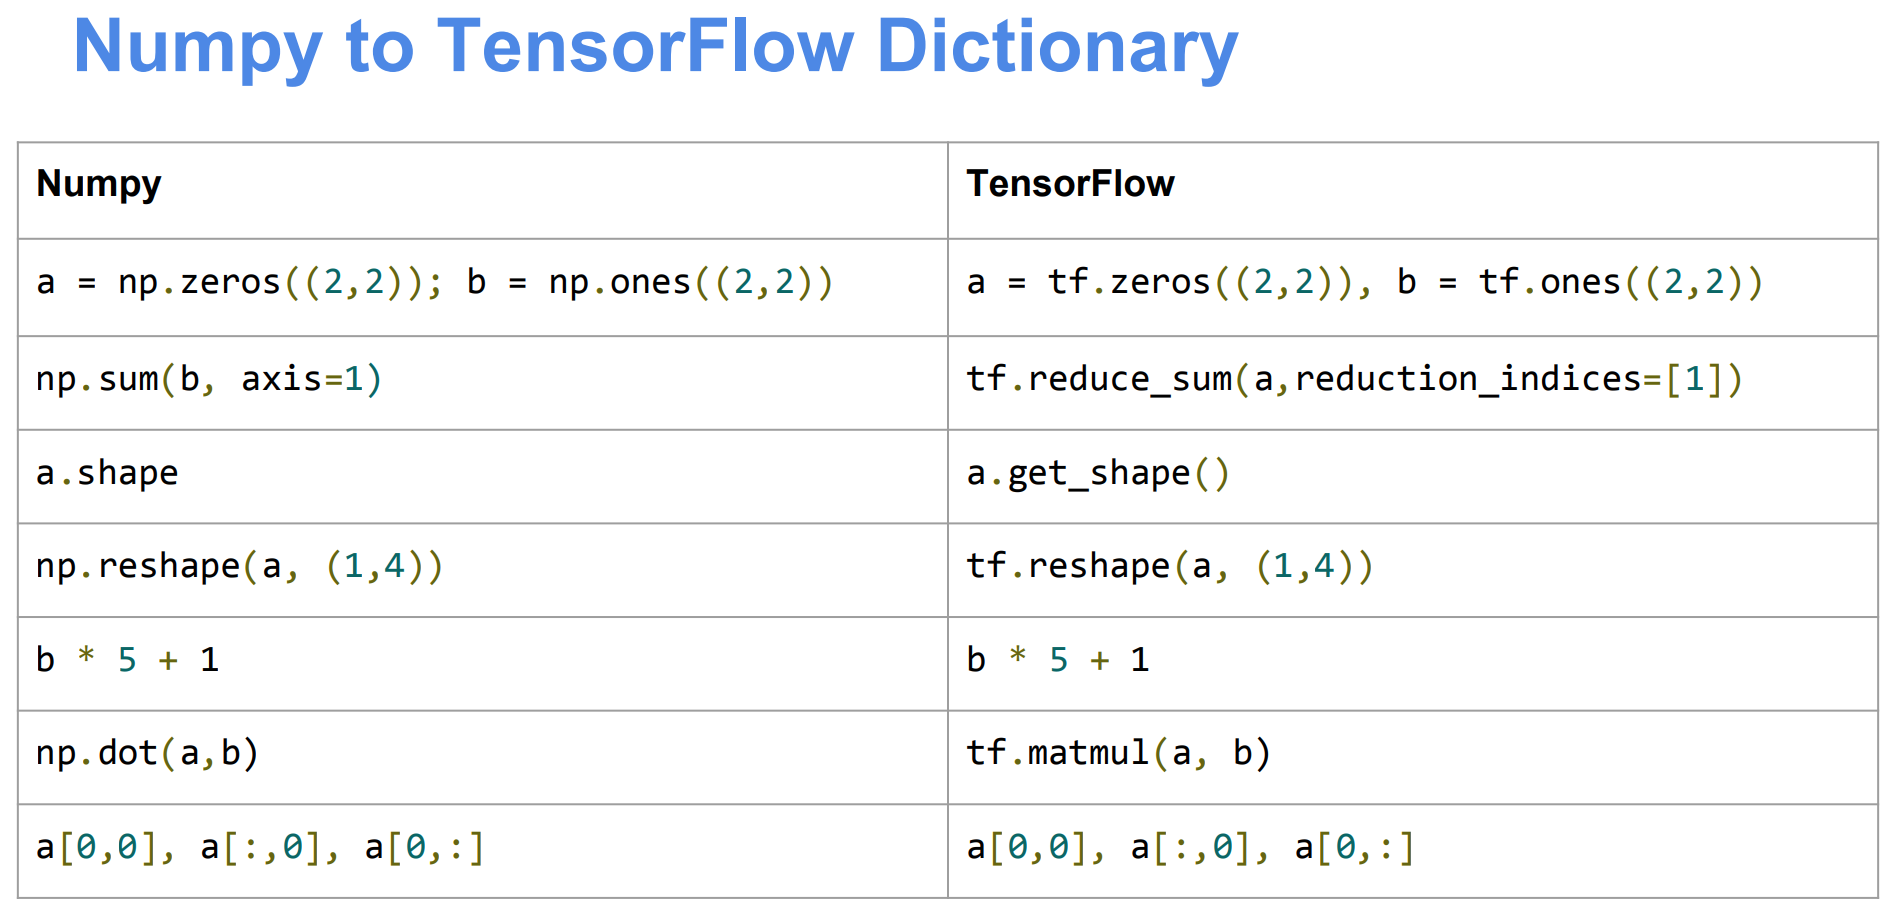

**Operations**

In [50]:
op1 = tf.add(a,b)
op1

<tf.Tensor: shape=(), dtype=int32, numpy=30>

In [51]:
a+b # same as tf.add

<tf.Tensor: shape=(), dtype=int32, numpy=30>

In [52]:
v = a+b
u = v+2
w = v*u
z = w*3
z

<tf.Tensor: shape=(), dtype=int32, numpy=2880>

**Computational graph with @tf.function**

@tf.function is a very useful module that can be used to convert simple python functions into a highly optimized computational graph that can be run on any runtime environment. When we build a model and then train it TensorFlow we can compile the model and optimize the executions.

In [53]:
@tf.function
def func2(a,b):
        z = tf.multiply(a,b, name='z')
        y1 = tf.constant(3, name='3')
        y2 = tf.constant(4)
        w1 = tf.add(z, y1, name='w1')
        w2 = tf.add(z, y2, name='w2')
        
        return(w1+w2)

In [55]:
func2(10, 20)

<tf.Tensor: shape=(), dtype=int32, numpy=407>

In [56]:
tf.multiply?

In [57]:
# Setup a writer to save graph information and TensorFlow logs
# To be displayed with Tensorboard

writer = tf.summary.create_file_writer(logdir)
tf.summary.trace_on()

In [59]:
a = tf.constant(3)
b = tf.constant(4)
func2(a,b)
with writer.as_default():
    tf.summary.trace_export(
        name="func2",
        step=0,
        profiler_outdir=logdir)

In [60]:
logdir

'/root/tf_logs/r20210629112840/'

In [64]:
# run tensorboard in the shell
!tensorboard --logdir $logdir

2021-06-29 12:41:56.609422: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.5.0 at http://localhost:6006/ (Press CTRL+C to quit)
Error in atexit._run_exitfuncs:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorboard/manager.py", line 275, in remove_info_file
    os.unlink(_get_info_file_path())
  File "/usr/local/lib/python3.7/dist-packages/tensorboard/manager.py", line 248, in _get_info_file_path
    return os.path.join(_get_info_dir(), "pid-%d.info" % os.getpid())
  File "/usr/local/lib/python3.7/dist-packages/tensorboard/manager.py", line 231, in _get_info_dir
    os.makedirs(path)


**tf.function and Conditional statements**

In [65]:
#It is difficult to use conditions in graphs but we could implement that easily using @tf.function decorator
@tf.function 
def g(x):
    y = tf.reduce_sum(x)
    if y > 0:
        return y
    return tf.abs(y)

In [66]:
print(tf.autograph.to_code(g.python_function))

def tf__g(x):
    with ag__.FunctionScope('g', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        y = ag__.converted_call(ag__.ld(tf).reduce_sum, (ag__.ld(x),), None, fscope)

        def get_state():
            return (do_return, retval_)

        def set_state(vars_):
            nonlocal retval_, do_return
            (do_return, retval_) = vars_

        def if_body():
            nonlocal retval_, do_return
            try:
                do_return = True
                retval_ = ag__.ld(y)
            except:
                do_return = False
                raise

        def else_body():
            nonlocal retval_, do_return
            try:
                do_return = True
                retval_ = ag__.converted_call(ag__.ld(tf).abs, (ag__.ld(y),), None, fscope)
            except:
                do_return 


**Calculate gradients**
Gradient evaluation is very importnat machine learning because it is based on function optimization. You can use tf.GradientTape() method to record the gradient of an arbitrary function

In [67]:
w = tf.Variable(3.0)

# Gradient scope for the function w^2
with tf.GradientTape() as tape:
    expression = tf.exp(w) + 2 * w +  w * w

grad = tape.gradient(expression, w)
print(f'The gradient of exp at {w.numpy()} is {grad.numpy()}')


The gradient of exp at 3.0 is 28.08553695678711


Gradient of the Sigmoid function
In this example we evaluate the gradient of the sigmoid function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$
Note that

$$\sigma'(x) = \frac{e^{-x}}{(1+e^{-x})^2} = \sigma(x)(1-\sigma(x)) $$
For instance

$$\sigma'(0) = \sigma(0)(1-\sigma(0)) = \frac{1}{2}\left(1-\frac{1}{2} \right) = \frac{1}{4}$$


In [68]:
def sigmoid(x):
    return 1/(1 + tf.exp(-x))

In [69]:
#define a varaible
x = tf.Variable(0.)

#record the gradient
with tf.GradientTape() as tape:
    sig = sigmoid(x)
    
res = tape.gradient(sig, x).numpy()
print('The gradient of the sigmoid function at 0.0 is ', res)

The gradient of the sigmoid function at 0.0 is  0.25
